In [134]:
import pandas as pd 

In [135]:
train = pd.read_csv('datasets/HousePricesTrain.csv')
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [136]:
test = pd.read_csv('datasets/test.csv')
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [137]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [138]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [139]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


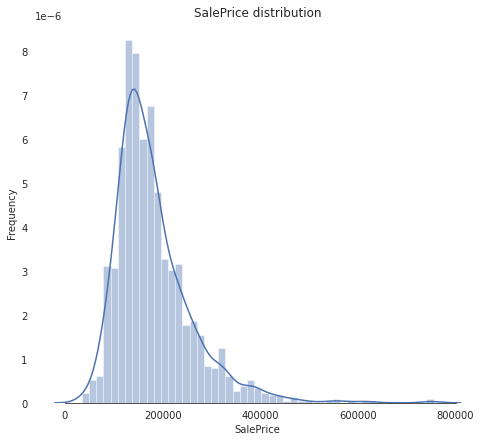

In [140]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(train['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [141]:
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape, test.shape

((1460, 80), (1459, 79))

In [142]:
# log transformación
train["SalePrice"] = np.log1p(train["SalePrice"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



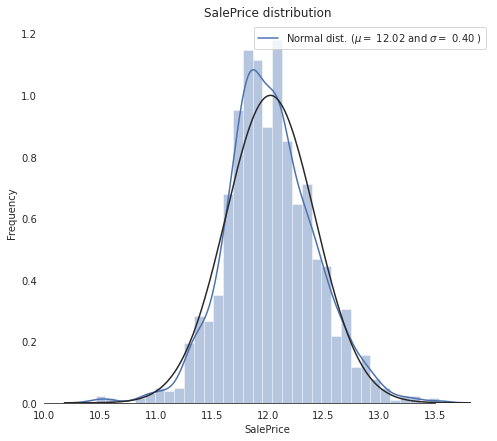

In [143]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

In [144]:
# Split features and labels
train_labels = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(2919, 79)

In [145]:
#missing data
total = all_features.isnull().sum().sort_values(ascending=False)
percent = (all_features.isnull().sum()/all_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [146]:
all_features['MSSubClass']

0        60
1        20
2        60
3        70
4        60
       ... 
2914    160
2915    160
2916     20
2917     85
2918     60
Name: MSSubClass, Length: 2919, dtype: int64

In [147]:
all_features['OverallCond']

0       5
1       8
2       5
3       5
4       5
       ..
2914    7
2915    5
2916    7
2917    5
2918    5
Name: OverallCond, Length: 2919, dtype: int64

In [148]:
all_features['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [149]:
# Se pasan a String porque son variables categóricas
all_features['MSSubClass'] = all_features['MSSubClass'].apply(str)
all_features['YrSold'] = all_features['YrSold'].astype(str)
all_features['MoSold'] = all_features['MoSold'].astype(str)

In [150]:
## Algunss variables deben tener una categoría 'None' de acuerdo al contexto, por ejemplo en la característica PoolQC,
## Hay valores en blanco que significa que no hay piscina en la casa.
missing_categoric = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_categoric:
    all_features[i] = all_features[i].fillna('None')

In [151]:
# En estas variables, los valores nulos se deben reemplazar por cero, de acuerdo al contexto
## Por ejemplo con GarageArea, significa que no hay garage, entonces no aplica y no se podría poner el promedio, por ejemplo.
missing_numeric = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_numeric:
    all_features[i] = all_features[i].fillna(0)
    
# Según el contexto de la variable, se opta por llenar sus valores faltantes con la mediana de los de su
## mismo vecindario. 
all_features['LotFrontage'] = all_features.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.median()))

In [152]:
## De acuerdo al contexto no se pueden llenar los valores faltantes con ceros o 'None'
# Por ser una variable categórica, tampoco por la media ni la mediana, se oprta por llenar la variable con la moda.
all_features['MSZoning'] = all_features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [153]:
# Se llena según explicación de la descripción del dataset
all_features['Functional'] = all_features['Functional'].fillna('Typ') 

In [154]:
all_features['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [155]:
all_features['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [156]:
all_features['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [157]:
## Se llenan con la moda
all_features['Utilities'] = all_features['Utilities'].fillna('AllPub') 
all_features['KitchenQual'] = all_features['KitchenQual'].fillna("TA") 
all_features['Electrical'] = all_features['Electrical'].fillna("SBrkr")

In [158]:
## Se llenan con la moda
all_features['Exterior1st'] = all_features['Exterior1st'].fillna(all_features['Exterior1st'].mode()[0]) 
all_features['Exterior2nd'] = all_features['Exterior2nd'].fillna(all_features['Exterior2nd'].mode()[0])
all_features['SaleType'] = all_features['SaleType'].fillna(all_features['SaleType'].mode()[0])

In [159]:
## Se comprueba que no hayan datos faltantes
total = all_features.isnull().sum().sort_values(ascending=False)
percent = (all_features.isnull().sum()/all_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SaleCondition,0,0.0
Foundation,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
BsmtQual,0,0.0


In [160]:
all_features['Utilities'].value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [161]:
all_features['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [162]:
all_features['PoolQC'].value_counts()

None    2909
Ex         4
Gd         4
Fa         2
Name: PoolQC, dtype: int64

In [163]:
all_features = all_features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

In [164]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_features.columns:
    if all_features[i].dtype in numeric_dtypes:
        numeric.append(i)

In [165]:
skew_features = all_features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 25 numerical features with Skew > 0.5 :


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
dtype: float64

In [172]:
all_features['PoolArea'].value_counts()

0      2906
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

In [173]:
all_features['TotalSF'] = (all_features['TotalBsmtSF'] 
                       + all_features['1stFlrSF'] 
                       + all_features['2ndFlrSF'])

all_features['YrBltAndRemod'] = all_features['YearBuilt'] + all_features['YearRemodAdd']

all_features['Total_sqr_footage'] = (all_features['BsmtFinSF1'] 
                                 + all_features['BsmtFinSF2'] 
                                 + all_features['1stFlrSF'] 
                                 + all_features['2ndFlrSF']
                                )
                                 

all_features['Total_Bathrooms'] = (all_features['FullBath'] 
                               + (0.5 * all_features['HalfBath']) 
                               + all_features['BsmtFullBath'] 
                               + (0.5 * all_features['BsmtHalfBath'])
                              )
                               

all_features['Total_porch_sf'] = (all_features['OpenPorchSF'] 
                              + all_features['3SsnPorch'] 
                              + all_features['EnclosedPorch'] 
                              + all_features['ScreenPorch'] 
                              + all_features['WoodDeckSF'])

In [174]:
## Se crean nuevas variables, por ejemplo, tiene sentido una variable de si hay piscina o no, 
# Que tendría el valor de 1, si poolArea tiene un valor mayor a 0.
all_features['haspool'] = all_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['has2ndfloor'] = all_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasgarage'] = all_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasbsmt'] = all_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_features['hasfireplace'] = all_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [175]:
all_features = pd.get_dummies(all_features).reset_index(drop=True)
all_features.shape

(2919, 334)

In [176]:
all_features.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [177]:
X = all_features.iloc[:len(train_labels), :]
X_test = all_features.iloc[len(train_labels):, :]
X.shape, train_labels.shape, X_test.shape

((1460, 334), (1460,), (1459, 334))

In [178]:
Y = train_labels

In [179]:
variables=(0,
 1,
 2,
 3,
 4,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 30,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 51,
 52,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 64,
 66,
 67,
 69,
 71,
 73,
 74,
 76,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 97,
 98,
 99,
 100,
 101,
 103,
 104,
 105,
 107,
 108,
 111,
 112,
 113,
 114,
 119,
 120,
 122,
 123,
 124,
 125,
 126,
 129,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 144,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 166,
 167,
 168,
 169,
 170,
 171,
 173,
 174,
 176,
 177,
 178,
 180,
 181,
 182,
 184,
 185,
 186,
 187,
 188,
 189,
 191,
 192,
 193,
 195,
 196,
 199,
 201,
 202,
 203,
 204,
 205,
 207,
 208,
 209,
 211,
 212,
 213,
 216,
 217,
 218,
 219,
 221,
 222,
 223,
 226,
 227,
 230,
 231,
 232,
 233,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 243,
 244,
 247,
 248,
 249,
 250,
 253,
 255,
 256,
 257,
 259,
 261,
 262,
 263,
 264,
 265,
 266,
 268,
 269,
 270,
 271,
 272,
 273,
 275,
 276,
 277,
 278,
 279,
 280,
 282,
 283,
 284,
 285,
 286,
 288,
 289,
 292,
 293,
 295,
 296,
 297,
 298,
 300,
 301,
 302,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 317,
 318,
 319,
 320,
 321,
 324,
 325,
 327,
 328,
 329,
 332,
 333)

In [180]:
columnas = X.columns[list(variables)]
columnas

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=250)

In [181]:
X = X[columnas]

In [182]:
X.shape

(1460, 250)

In [183]:
Y = Y.to_numpy()

In [184]:
X = X.to_numpy()

In [185]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [186]:
def rmse(y_actual, y_predicted):
  rms = np.sqrt(mean_squared_error(y_actual, y_predicted))
  return rms

# Gradient Boosting 

In [187]:
from scipy.spatial import distance

In [188]:
from  sklearn.ensemble import GradientBoostingRegressor

In [189]:
def experimentar_GB(num_trees,numero_de_variables, X, Y):
    """funcion que realiza experimentos de random forest
    num_trees: list[int]: lista con el número de arboles usado para el RF
    numero_de_variables list[int]: lista con variables para la selección del mejor umbral en cada nodo 
    X: matriz con las caractersiticas
    Y: matriz de numpy con etiquetas
    retorna: dataframe con:
        -  numero de arboles usados
        -  variables para la selección del mejor umbral
        - eficiencia de entrenamiento
        - desviacion de estandar eficiencia de entrenamiento
        - eficiencia de prueba
        - desviacion estandar eficiencia de prueba
    """
    
    folds = 5
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    
    for trees in num_trees:
        for num_variables in numero_de_variables:
            ## para almacenar los errores intermedios
            EficienciaTrain = []
            EficienciaVal = []
            EficienciaTrain2 = []
            EficienciaVal2 = []
            
            EficienciaTrain3 = []
            EficienciaVal3 = []
            EficienciaTrain4 = []
            EficienciaVal4 = []
            for train, test in skf.split(X=X):
                
                Xtrain, Xtest = X[train], X[test]
                Ytrain, Ytest = Y[train], Y[test]  
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                modelo = GradientBoostingRegressor(n_estimators=trees,max_features=num_variables)
                modelo.fit(Xtrain,Ytrain)
                #predecir muestras de entrenamiento
                Ytrain_pred = modelo.predict(Xtrain)
                #predecir muestras de pruebas
                Yest = modelo.predict(Xtest)
                #Evaluamos las predicciones del modelo con los datos de test
                EficienciaTrain.append(MAPE(Ytrain,Ytrain_pred))
                EficienciaVal.append(MAPE(Ytest, Yest))
    
                EficienciaTrain2.append(rmse(Ytrain,Ytrain_pred))
                EficienciaVal2.append(rmse(Ytest, Yest))
            
                Ytrain1 = np.expm1(Ytrain)
                Ytrain_pred1 = np.expm1(Ytrain_pred)
                Ytest1 = np.expm1(Ytest)
                Yest1 = np.expm1(Yest)
            
                EficienciaTrain3.append(MAPE(Ytrain1,Ytrain_pred1))
                EficienciaVal3.append(MAPE(Ytest1, Yest1))
    
                EficienciaTrain4.append(rmse(Ytrain1,Ytrain_pred1))
                EficienciaVal4.append(rmse(Ytest1, Yest1))
            
            resultados.loc[idx,'número de arboles'] = trees
            resultados.loc[idx,'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx,'MAPE de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx,'MAPE Eprueba'] = np.mean(EficienciaVal)
            resultados.loc[idx,'MAPE - IC prueba'] = np.std(EficienciaVal)
            resultados.loc[idx,'RMSE entrenamiento'] = np.mean(EficienciaTrain2)
            resultados.loc[idx,'RMSE prueba'] = np.mean(EficienciaVal2)
            resultados.loc[idx,'RMSE - IC prueba'] = np.std(EficienciaVal2)
            
            resultados.loc[idx,'MAPE de entrenamiento sin'] = np.mean(EficienciaTrain3)
            resultados.loc[idx,'MAPE Eprueba sin'] = np.mean(EficienciaVal3)
            resultados.loc[idx,'MAPE - IC prueba sin'] = np.std(EficienciaVal3)
            resultados.loc[idx,'RMSE entrenamiento sin'] = np.mean(EficienciaTrain4)
            resultados.loc[idx,'RMSE prueba sin'] = np.mean(EficienciaVal4)
            resultados.loc[idx,'RMSE - IC prueba sin'] = np.std(EficienciaVal4)
            
            
            idx= idx +1
        print(f"termina para {trees} arboles")
        
    return (resultados)

In [190]:
resultados2 = experimentar_GB([800], [100], X,Y)
resultados2

termina para 800 arboles


,número de arboles,variables para la selección del mejor umbral,MAPE de entrenamiento,MAPE Eprueba,MAPE - IC prueba,RMSE entrenamiento,RMSE prueba,RMSE - IC prueba,MAPE de entrenamiento sin,MAPE Eprueba sin,MAPE - IC prueba sin,RMSE entrenamiento sin,RMSE prueba sin,RMSE - IC prueba sin
0,800.0,100.0,0.14589,0.669284,0.017517,0.023127,0.117604,0.008454,1.751328,8.182321,0.351084,4208.558966,23583.190479,3063.620567


# Ventana de Parzen - VP

In [191]:
from scipy.spatial.distance import euclidean

In [192]:
def kernel_gaussiano(x):
    return (np.exp((-0.5)*x**2))

def ParzenWindow(x,Data,h,Datay=None):
    """"ventana de parzen
    x: vector con representando una sola muestra
    Data: vector de muestras de entrenamiento
    h: ancho de la ventana de kernel
    Datay: vector con los valores de salida (y), Si no se pasa como argumento, 
        se calcula un ventana de parzen sin multiplicar los valores de este vector.
    retorna: el valor de ventana de parzen para una muestra
    """
    h = h
    Ns = Data.shape[0]
    suma = 0
    for k in range(Ns):
        u = euclidean(x,Data[k,:])
        if Datay is None:
            suma += kernel_gaussiano(u/h)
        else:
            suma += kernel_gaussiano(u/h)*Datay[k]
    return suma

In [193]:
def Nadaraya_Watson(X_train, Y_train, X_test, h):
    """ Funcion que implementa metodo de ventana de parzen para
        para clasificación
    X_train: es la matriz con las muestras de entrenamiento
    Y_train: es un vector con los valores de salida pra cada una de las muestras de entrenamiento
    X_test: es la matriz con las muestras de validación
    h (float): ancho de h de la ventana
    retorna: - las estimaciones del modelo parzen para el conjunto X_test 
              esta matriz debe tener un shape de [row/muestras de X_test]
             - las probabilidades de la vetana [row/muestras de X_test, numero de clases]  
    """
        
    Yest = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
      Yest[i]= ParzenWindow(X_test[i],X_train,h,Y_train)/ParzenWindow(X_test[i],X_train,h,Datay=None)
    
    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.  
    return Yest

In [194]:
def experimentarParzen (X, Y, hs):
    """Función que realiza los experimentos con knn usando
       una estrategia de validacion entrenamiento y pruebas
    X: matriz de numpy conjunto con muestras y caracteristicas
    Y: vector de numpy con los valores de las etiquetas
    ks: List[int/float] lista con los valores de k-vecinos a usar
    retorna: dataframe con los resultados, debe contener las siguientes columnas:
        - el ancho de ventana, 
        - el error medio de prueba
        - la desviacion estandar del error
        - número de promedio en el conjunto de prueba/validacion
    """
    # se usa la función para implementar la estrategia de validación.
    kfolds = KFold(n_splits=4)
    resultados = pd.DataFrame()
    idx = 0
    # iteramos sobre los valores de hs
    for h in hs:
        # lista para almacenar los errores y numero de muestras
        # de cada iteración
        # de la validación
        error_temp = []
        error_temp2 = []
        error_temp3 = []
        error_temp4 = []
        
        numero_muestras = []
        
        for train, test in kfolds.split(X):

            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]
            #normalizamos los datos
            scaler = StandardScaler()
            scaler.fit(Xtrain)
            Xtrain = scaler.transform(Xtrain)
            Xtest = scaler.transform(Xtest)
            
            Yest = Nadaraya_Watson(Xtrain,Ytrain,Xtest,h)            
            errorTest = MAPE(Ytest,Yest)
            error_temp.append(errorTest)
            errorTest = rmse(Ytest,Yest)
            error_temp2.append(errorTest)
            
            Yest1 = np.expm1(Yest)
            Ytest1 = np.expm1(Ytest)
            errorTest = MAPE(Ytest1,Yest1)
            error_temp3.append(errorTest)
            errorTest = rmse(Ytest1,Yest1)
            error_temp4.append(errorTest)
            
            numero_muestras.append(Xtest.shape[0])
    
        resultados.loc[idx,'ancho de ventana'] = h 
        resultados.loc[idx,'MAPE con transformacion'] = np.mean(error_temp)
        resultados.loc[idx,'MAPE desviación estandar con'] =np.std(error_temp)
        resultados.loc[idx,'RMSE con transformacion'] = np.mean(error_temp2)
        resultados.loc[idx,'RMSE desviación estandar con'] =np.std(error_temp2)
        
        resultados.loc[idx,'MAPE sin transformar'] = np.mean(error_temp3)
        resultados.loc[idx,'MAPE desviación estandar sin'] =np.std(error_temp3)
        resultados.loc[idx,'RMSE sin transformar'] = np.mean(error_temp4)
        resultados.loc[idx,'RMSE desviación estandar sin'] =np.std(error_temp4)
        resultados.loc[idx,'muestras en conjunto de pruebas (media)'] = np.mean(numero_muestras)
        idx+=1
    return (resultados)

In [195]:
hs = [3.5]
experimentos_parzen = experimentarParzen(X,Y, hs)

In [196]:
experimentos_parzen

,ancho de ventana,MAPE con transformacion,MAPE desviación estandar con,RMSE con transformacion,RMSE desviación estandar con,MAPE sin transformar,MAPE desviación estandar sin,RMSE sin transformar,RMSE desviación estandar sin,muestras en conjunto de pruebas (media)
0,3.5,1.230661,0.060913,0.207626,0.012756,15.214861,0.913107,43374.747212,4670.474484,365.0


# Random Forest

In [197]:
from  sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [198]:
def experimentar_rf(num_trees,numero_de_variables, X, Y):
    folds = 10
    skf = KFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    
    for trees in num_trees:
        for num_variables in numero_de_variables:
            ## para almacenar los errores intermedios
            EficienciaTrain = []
            EficienciaVal = []
            EficienciaTrain2 = []
            EficienciaVal2 = []
            
            EficienciaTrain3 = []
            EficienciaVal3 = []
            EficienciaTrain4 = []
            EficienciaVal4 = []
            for train, test in skf.split(X=X):
                
                Xtrain, Xtest = X[train], X[test]
                Ytrain, Ytest = Y[train], Y[test]  
                
                scaler = StandardScaler().fit(X=Xtrain)
                Xtrain = scaler.fit_transform(Xtrain)
                Xtest = scaler.transform(Xtest)
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                modelo = RandomForestRegressor(n_estimators=trees,max_features=num_variables)
                modelo.fit(Xtrain,Ytrain)
                #predecir muestras de entrenamiento
                Ytrain_pred = modelo.predict(Xtrain)
                #predecir muestras de pruebas
                Yest = modelo.predict(Xtest)
                #Evaluamos las predicciones del modelo con los datos de test
                EficienciaTrain.append(MAPE(Ytrain,Ytrain_pred))
                EficienciaVal.append(MAPE(Ytest, Yest))
    
                EficienciaTrain2.append(rmse(Ytrain,Ytrain_pred))
                EficienciaVal2.append(rmse(Ytest, Yest))

                Ytrain1 = np.expm1(Ytrain)
                Ytrain_pred1 = np.expm1(Ytrain_pred)
                Ytest1 = np.expm1(Ytest)
                Yest1 = np.expm1(Yest)
            
                EficienciaTrain3.append(MAPE(Ytrain1,Ytrain_pred1))
                EficienciaVal3.append(MAPE(Ytest1, Yest1))
    
                EficienciaTrain4.append(rmse(Ytrain1,Ytrain_pred1))
                EficienciaVal4.append(rmse(Ytest1, Yest1))                
                
                
            resultados.loc[idx,'número de arboles'] = trees
            resultados.loc[idx,'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx,'MAPE de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx,'MAPE Eprueba'] = np.mean(EficienciaVal)
            resultados.loc[idx,'MAPE - IC prueba'] = np.std(EficienciaVal)
            resultados.loc[idx,'RMSE entrenamiento'] = np.mean(EficienciaTrain2)
            resultados.loc[idx,'RMSE prueba'] = np.mean(EficienciaVal2)
            resultados.loc[idx,'RMSE - IC prueba'] = np.std(EficienciaVal2)
            resultados.loc[idx,'MAPE de entrenamiento sin'] = np.mean(EficienciaTrain3)
            resultados.loc[idx,'MAPE Eprueba sin'] = np.mean(EficienciaVal3)
            resultados.loc[idx,'MAPE - IC prueba sin'] = np.std(EficienciaVal3)
            resultados.loc[idx,'RMSE entrenamiento sin'] = np.mean(EficienciaTrain4)
            resultados.loc[idx,'RMSE prueba sin'] = np.mean(EficienciaVal4)
            resultados.loc[idx,'RMSE - IC prueba sin'] = np.std(EficienciaVal4)
            
            idx= idx +1
        print(f"termina para {trees} arboles")
        
    return (resultados)

In [199]:
resultados1 = experimentar_rf([2500], [100], X,Y)

termina para 2500 arboles


In [200]:
resultados1

,número de arboles,variables para la selección del mejor umbral,MAPE de entrenamiento,MAPE Eprueba,MAPE - IC prueba,RMSE entrenamiento,RMSE prueba,RMSE - IC prueba,MAPE de entrenamiento sin,MAPE Eprueba sin,MAPE - IC prueba sin,RMSE entrenamiento sin,RMSE prueba sin,RMSE - IC prueba sin
0,2500.0,100.0,0.276115,0.748654,0.054332,0.049905,0.133625,0.016201,3.335476,9.289275,0.839263,10511.581708,27628.961164,6744.171262
